In [1]:
%load_ext lab_black

# EDA 
author: Dawid Pludowski

In [2]:
# modules
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# params
datapath = "./../data/data.csv"

In [4]:
df = pd.read_csv(datapath, encoding="unicode_escape")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# EDA Part I - Exploring structure

Let's explore some basic information about the dataset.

In [5]:
df.shape

(541909, 8)

Some `null` values exist in `Description` and `CustomerID` variables. 

In [6]:
# null values percentage
df.isna().sum() / df.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

`InvoiceDate` and `CustomerID` have wrong datatype; we will fix that in later section.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df = df.where(pd.notnull(df), None)

## Column logic
Some columns seem to have non-atomic information; examples of such a complex information are shown below:

### Column InvoiceNo
`InvoiceNo` contains 6 digits and, optionally, one letter (A or C).

In [9]:
(df.InvoiceNo.isna()).sum()

0

In [10]:
print(f"sample invoice number: {np.unique(df.InvoiceNo)}")
vec_len = np.vectorize(len)
print(f"unique lengths: {np.unique(vec_len(df.InvoiceNo))}")
print()

first_chars = np.unique(
    (df.InvoiceNo[vec_len(df.InvoiceNo) == 7]).apply(lambda x: x[0])
)
print(f"first chars: {first_chars}")

sample invoice number: ['536365' '536366' '536367' ... 'C581499' 'C581568' 'C581569']
unique lengths: [6 7]

first chars: ['A' 'C']


### Column `StockCode`
`StockCode` column is not as regular as it looks at the first glance. Besides entries like **XXXXXY**, where **X** stands for any digit and **Y** for any capital letter, it contains also some strings that look like special marks.

In [11]:
print(f"sample invoice number: {np.unique(df.StockCode)}")
vec_len = np.vectorize(len)
print(f"unique lengths: {np.unique(vec_len(df.StockCode))}")

sample invoice number: ['10002' '10080' '10120' ... 'gift_0001_40' 'gift_0001_50' 'm']
unique lengths: [ 1  2  3  4  5  6  7  8  9 12]


In [12]:
unusual_stock_code = df.StockCode[~df.StockCode.str.contains("^[0-9]+[A-Za-z]{0,2}$")]
print(np.unique(unusual_stock_code))
print(unusual_stock_code.count())

['AMAZONFEE' 'B' 'BANK CHARGES' 'C2' 'CRUK' 'D' 'DCGS0003' 'DCGS0004'
 'DCGS0055' 'DCGS0057' 'DCGS0066P' 'DCGS0067' 'DCGS0068' 'DCGS0069'
 'DCGS0070' 'DCGS0071' 'DCGS0072' 'DCGS0073' 'DCGS0074' 'DCGS0076'
 'DCGSSBOY' 'DCGSSGIRL' 'DOT' 'M' 'PADS' 'POST' 'S' 'gift_0001_10'
 'gift_0001_20' 'gift_0001_30' 'gift_0001_40' 'gift_0001_50' 'm']
2995


### Column `Description`
Most records have 4 words. Some of them has non-capital letters; we will fix it in later section.

In [13]:
number_of_words = df.Description.apply(lambda x: len(str.split(str(x))))
number_of_words_df = (
    pd.DataFrame(number_of_words.value_counts())
    .sort_index()
    .reset_index()
    .rename(columns={"index": "number_of_words", "Description": "occurences"})
)
number_of_words_df

,number_of_words,occurences
0,1,4089
1,2,12020
2,3,88466
3,4,212591
4,5,140746
5,6,66240
6,7,16757
7,8,1000


[Text(0.5, 1.0, 'number of words in Description'),
 Text(0.5, 0, 'Number of words'),
 Text(0, 0.5, 'Occurences')]

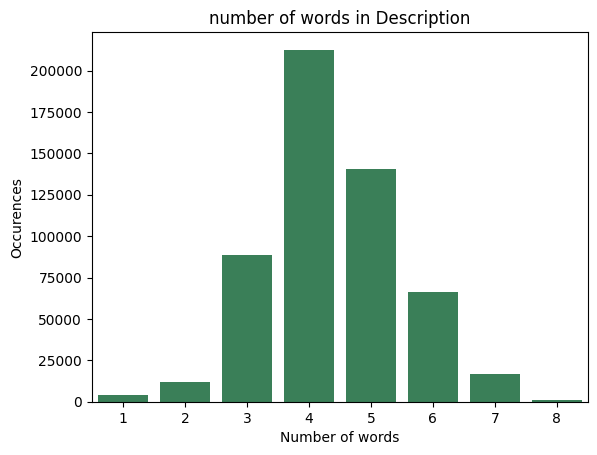

In [14]:
sns.barplot(
    data=number_of_words_df, x="number_of_words", y="occurences", color="seagreen"
).set(
    title="number of words in Description",
    xlabel="Number of words",
    ylabel="Occurences",
)

In [15]:
(
    df.Description
    != df.Description.apply(lambda x: str.upper(x) if x is not None else None)
).sum()

4490

In [16]:
df[
    df.Description
    != df.Description.apply(lambda x: str.upper(x) if x is not None else None)
]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
482,536408,21705,BAG 500g SWIRLY MARBLES,12,12/1/2010 11:41,1.65,14307.0,United Kingdom
622,536414,22139,None,56,12/1/2010 11:52,0.00,NaN,United Kingdom
918,536500,46000M,POLYESTER FILLER PAD 45x45cm,10,12/1/2010 12:35,1.55,17377.0,United Kingdom
1961,536544,21703,BAG 125g SWIRLY MARBLES,1,12/1/2010 14:32,0.85,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
540654,581492,21704,BAG 250g SWIRLY MARBLES,1,12/9/2011 10:03,1.63,NaN,United Kingdom
541054,581492,22965,3 TRADITIONAl BISCUIT CUTTERS SET,1,12/9/2011 10:03,4.13,NaN,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541612,581514,21705,BAG 500g SWIRLY MARBLES,84,12/9/2011 11:20,0.39,17754.0,United Kingdom


### Column `Quantity`
Although negative `Quantity` might be treated as `None` values, we should investigate it further, as variety of negative values might be caused by accidentally adding minus to proper number as well. Alternatively, it may indicate order that are returned to shop. 

We can also see that there some extreme values.

In [17]:
(df.Quantity == 0).sum()

0

In [18]:
df[df.Quantity < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [19]:
df.Quantity[df.Quantity < 0].count()

10624

<AxesSubplot: xlabel='Quantity', ylabel='Count'>

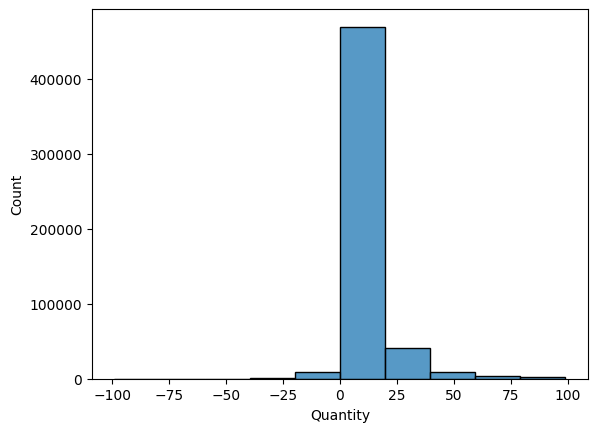

In [20]:
sns.histplot(data=df[np.abs(df.Quantity) < 100], x="Quantity", bins=10)

In [21]:
df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

### Column `InvoiceDate`  
`InvoiceDate` column has records that have precision up to one minute. There are much more total records than unique timestamps, it may be caused by some aggregation while saving to database.

In [22]:
timestamps = df.InvoiceDate.astype("datetime64")

print(np.unique(np.sort(timestamps)))
print(f"Number of unique timestampes: {np.unique(np.sort(timestamps)).shape[0]}")

['2010-12-01T08:26:00.000000000' '2010-12-01T08:28:00.000000000'
 '2010-12-01T08:34:00.000000000' ... '2011-12-09T12:31:00.000000000'
 '2011-12-09T12:49:00.000000000' '2011-12-09T12:50:00.000000000']
Number of unique timestampes: 23260


### Column `UnitPrice`    
Some `UnitPrice` entries are equal to `0`, which should be considered as `None` value. Negative values should be treated as invalid.

In [23]:
df[df.UnitPrice == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,None,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,None,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,None,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,None,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,None,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,None,27,12/8/2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,None,20,12/8/2011 14:06,0.0,NaN,United Kingdom


In [24]:
df[df.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


#### Column `CustomerID`   
There are many shipping records for each customer.

In [25]:
df.CustomerID.unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [26]:
(df.CustomerID == 0).sum()

0

In [27]:
print(f"no of records: {df.CustomerID.count()}")
print(f"no of unique customers: {df.CustomerID.unique().shape[0]}")

no of records: 406829
no of unique customers: 4373


### Column `Country`
**Unspecified** is `None` for `Country`

In [28]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

## `None` summary
Some records has `None` values on each `Description`, `UnitPrice` and `CustomerID`. We will remove such records, as they:
 - have no significant information;
 - are only a small fraction of the whole dataset;

In [29]:
df[(df.Description.isna()) & (df.UnitPrice == 0) & (df.CustomerID.isna())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,None,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,None,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,None,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,None,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,None,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,None,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,None,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,None,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,None,27,12/8/2011 10:33,0.0,NaN,United Kingdom
